In [196]:
import pandas as pd 
import numpy as np

In [197]:
df=pd.read_csv("modified_placement_data.csv")
df.sample(2)

,cgpa,iq,placement
44,"7,5",61.0,Yes
10,"6,0",45.0,Yes


Data Preprocessing

In [198]:
df['placement'] = df['placement'].map({'Yes':1 ,'No':0})  
df 

,cgpa,iq,placement
0,"6,8",123.0,1
1,"5,9",106.0,0
2,"5,3",121.0,0
3,"7,4",132.0,1
4,"5,8",142.0,0
...,...,...,...
95,"4,3",200.0,0
96,"4,4",42.0,0
97,"6,7",182.0,1
98,"6,3",103.0,1


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [200]:
df["cgpa"]=df['cgpa'].str.replace(",",".").astype(float)


In [201]:
df['cgpa']

0     6.8
1     5.9
2     5.3
3     7.4
4     5.8
     ... 
95    4.3
96    4.4
97    6.7
98    6.3
99    6.2
Name: cgpa, Length: 100, dtype: float64

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [203]:
mean_value=df['cgpa'].mean()

In [204]:
df['cgpa'].fillna(mean_value,inplace=True)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [206]:
df.sample(4)

,cgpa,iq,placement
11,6.9,138.0,1
27,6.0,124.0,1
63,6.3,128.0,1
10,6.0,45.0,1


In [207]:
df.sample(3)

,cgpa,iq,placement
90,7.3,86.0,1
95,4.3,200.0,0
86,5.1,128.0,0


EDA

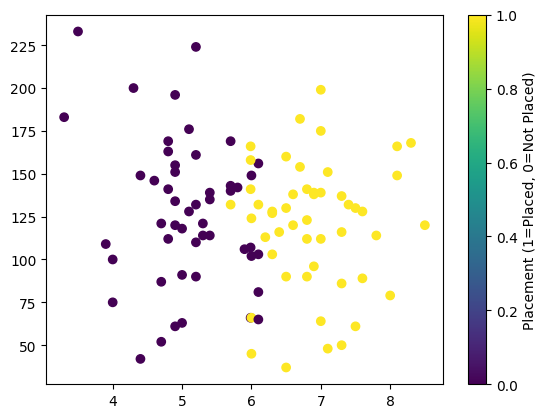

In [208]:
from matplotlib import pyplot as plt 

plt.scatter(df['cgpa'] , df['iq'] , c=df['placement'])
plt.colorbar(label='Placement (1=Placed, 0=Not Placed)')

In [209]:
df.sample(2)

,cgpa,iq,placement
84,5.7,169.0,0
14,6.1,103.0,0


In [210]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1:]

In [211]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [212]:
y.shape

(100, 1)

In [213]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [214]:

X_train

,cgpa,iq
83,7.5,130.0
44,7.5,61.0
74,6.7,154.0
78,6.1,81.0
68,4.0,75.0
...,...,...
71,6.1,132.0
62,6.0,102.0
80,4.9,196.0
79,6.5,90.0


In [215]:
y_train

,placement
83,1
44,1
74,1
78,0
68,0
...,...
71,1
62,0
80,0
79,1


In [216]:
X_test

,cgpa,iq
3,7.4,132.0
58,8.0,79.0
66,6.9,96.0
17,3.3,183.0
93,6.8,112.0
82,6.5,37.0
40,4.9,134.0
96,4.4,42.0
35,6.8,90.0
56,6.1,65.0


In [217]:
y_test

,placement
3,1
58,1
66,1
17,0
93,1
82,1
40,0
96,0
35,1
56,0


In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [219]:
X_train = scaler.fit_transform(X_train)

In [220]:
X_train

array([[ 1.40234682,  0.09056485],
       [ 1.40234682, -1.71202401],
       [ 0.66673179,  0.71755228],
       [ 0.11502051, -1.18953449],
       [-1.81596896, -1.34628134],
       [-0.71254641,  0.90042362],
       [ 0.01242157,  0.82205019],
       [-0.25278701,  1.10941943],
       [-0.89645017, -1.65977506],
       [-1.08035392,  1.10941943],
       [ 0.01242157,  0.37793409],
       [-0.52864265,  0.32568514],
       [-1.1723058 , -0.14455544],
       [ 1.4942987 ,  0.0383159 ],
       [ 0.75868367,  0.37793409],
       [ 0.01242157, -0.5102981 ],
       [-0.80449829,  1.29229076],
       [-1.1723058 , -1.9471443 ],
       [-2.27572836,  2.78138591],
       [ 1.9540581 ,  0.5869299 ],
       [-0.71254641, -0.9544142 ],
       [-0.25278701,  0.1428138 ],
       [ 0.02306863, -1.58140163],
       [ 0.48282803,  0.09056485],
       [-1.44816144,  0.5869299 ],
       [ 0.94258742,  0.32568514],
       [ 1.0345393 , -2.0516422 ],
       [ 0.29892427,  0.0383159 ],
       [-1.26425768,

In [221]:
X_test = scaler.fit_transform(X_test)

In [222]:
X_test

array([[ 0.92979161,  0.81955752],
       [ 1.36225283, -0.42148672],
       [ 0.56940727, -0.02341593],
       [-2.02536002,  2.0137699 ],
       [ 0.4973304 ,  0.35123894],
       [ 0.28109979, -1.40495575],
       [-0.87213012,  0.86638938],
       [-1.23251446, -1.2878761 ],
       [ 0.4973304 , -0.1639115 ],
       [-0.00720769, -0.74930973]])

In [223]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()

In [224]:
clf1.fit(X_train,y_train)

C:\Users\alisa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [225]:
y_pred = clf1.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [226]:
y_test

,placement
3,1
58,1
66,1
17,0
93,1
82,1
40,0
96,0
35,1
56,0


In [227]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [232]:
import pickle

In [233]:
pickle.dump(clf1,open('model.pkl' , 'wb'))